In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler

In [10]:
rfc = RandomForestClassifier()
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
# Reads train & test features and labels data from files and returnes them as numpy arrays
X_train_df = pd.read_csv('X_train_header.txt')
y_train_df = pd.read_csv('y_train_header.txt')
X_test_df = pd.read_csv('X_test_header.txt')
y_test_df = pd.read_csv('y_test_header.txt');

n_train_samples = X_train_df.shape[0]
n_test_samples = X_test_df.shape[0]
n_features = X_train_df.shape[1]

X_train = np.array(X_train_df).reshape((n_train_samples,n_features))
y_train = np.array(y_train_df).reshape(n_train_samples,)    
X_test = np.array(X_test_df).reshape((n_test_samples,n_features))
y_test = np.array(y_test_df).reshape(n_test_samples,)

5 [0.8857821513403461]
10 [0.8857821513403461, 0.91136749236511716]
15 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457]
20 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457, 0.91523583305055989]
25 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457, 0.91523583305055989, 0.92120800814387516]
30 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457, 0.91523583305055989, 0.92120800814387516, 0.92012215812690878]
50 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457, 0.91523583305055989, 0.92120800814387516, 0.92012215812690878, 0.92609433322022405]
100 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457, 0.91523583305055989, 0.92120800814387516, 0.92012215812690878, 0.92609433322022405, 0.92378690193417035]
1000 [0.8857821513403461, 0.91136749236511716, 0.91435357991177457, 0.91523583305055989, 0.92120800814387516, 0.92012215812690878, 0.92609433322022405, 0.92378690193417035, 0.93009840515778763]


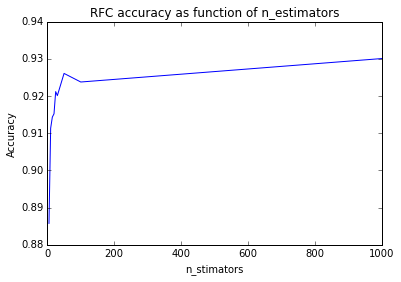

In [20]:
# 1. RFC Accuracy as function of number of trees (n_estimators)
#num_trees = range(5, 50, 5)
num_trees = [5, 10, 15, 20, 25, 30, 50, 100, 1000]
accuracies = []
for n in num_trees:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(num_trees, accuracies)
plt.xlabel('n_stimators')
plt.ylabel('Accuracy')
plt.title('RFC accuracy as function of n_estimators')
plt.show()   

1 [0.78629114353579921]
2 [0.78629114353579921, 0.84336613505259572]
3 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177]
4 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177, 0.88191381065490337]
5 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177, 0.88191381065490337, 0.88198167628096369]
9 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177, 0.88191381065490337, 0.88198167628096369, 0.90220563284696298]
24 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177, 0.88191381065490337, 0.88198167628096369, 0.90220563284696298, 0.90587037665422465]
100 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177, 0.88191381065490337, 0.88198167628096369, 0.90220563284696298, 0.90587037665422465, 0.90016966406515098]
250 [0.78629114353579921, 0.84336613505259572, 0.87146250424160177, 0.88191381065490337, 0.88198167628096369, 0.90220563284696298, 0.90587037665422465, 0.90016966406515098, 0.89406175771971486]
561 [0.7862911435357992

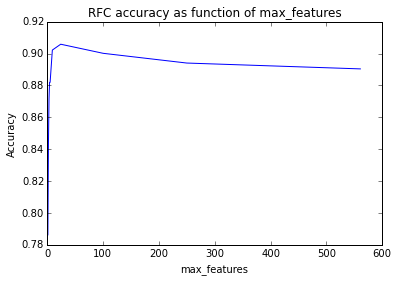

In [24]:
# 2. RFC Accuracy as function of max_features parameter
#num_features = range(1, n_features + 1)
num_features = [ 1, 2, 3, 4, 5, 9, 24, 100, 250, n_features] 
accuracies = []
for n in num_features:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(num_features, accuracies)
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('RFC accuracy as function of max_features') 
plt.show()

2 [0.69541907024092298]
4 [0.69541907024092298, 0.85497115710892435]
6 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298]
8 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298, 0.90166270783847968]
10 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298, 0.90166270783847968, 0.90451306413301658]
12 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298, 0.90166270783847968, 0.90451306413301658, 0.90906006107906345]
14 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298, 0.90166270783847968, 0.90451306413301658, 0.90906006107906345, 0.91089243298269429]
16 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298, 0.90166270783847968, 0.90451306413301658, 0.90906006107906345, 0.91089243298269429, 0.90580251102816445]
18 [0.69541907024092298, 0.85497115710892435, 0.89032914828639298, 0.90166270783847968, 0.90451306413301658, 0.90906006107906345, 0.91089243298269429, 0.90580251102816445, 0.90193417034272139]
20 [0.69541907024092298

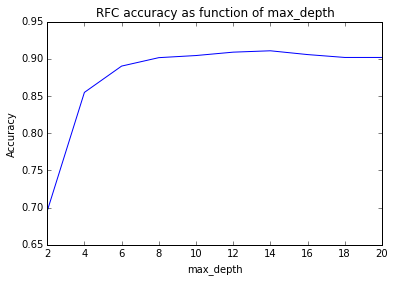

In [27]:
# 3. RFC Accuracy as function of max_depth parameter
max_depth = range(2, 21, 2)
accuracies = []
for n in max_depth:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(max_depth=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(max_depth, accuracies)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('RFC accuracy as function of max_depth') 
plt.show()

2 [0.90492025788937913]
4 [0.90492025788937913, 0.912385476756023]
6 [0.90492025788937913, 0.912385476756023, 0.91564302680692222]
8 [0.90492025788937913, 0.912385476756023, 0.91564302680692222, 0.91034950797421099]
10 [0.90492025788937913, 0.912385476756023, 0.91564302680692222, 0.91034950797421099, 0.91292840176450629]
12 [0.90492025788937913, 0.912385476756023, 0.91564302680692222, 0.91034950797421099, 0.91292840176450629, 0.90648116728876826]
14 [0.90492025788937913, 0.912385476756023, 0.91564302680692222, 0.91034950797421099, 0.91292840176450629, 0.90648116728876826, 0.90810994231421793]
16 [0.90492025788937913, 0.912385476756023, 0.91564302680692222, 0.91034950797421099, 0.91292840176450629, 0.90648116728876826, 0.90810994231421793, 0.90960298608754664]
18 [0.90492025788937913, 0.912385476756023, 0.91564302680692222, 0.91034950797421099, 0.91292840176450629, 0.90648116728876826, 0.90810994231421793, 0.90960298608754664, 0.91001017984390908]
20 [0.90492025788937913, 0.912385476756

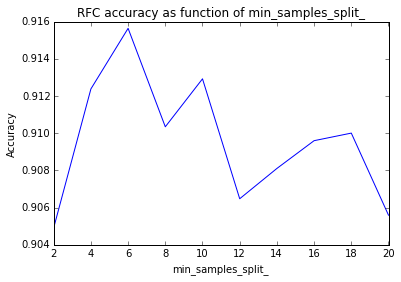

In [29]:
# 4. RFC Accuracy as function of min_samples_split parameter
min_samples_split = range(2, 21, 2)
accuracies = []
for n in min_samples_split:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(min_samples_split=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(min_samples_split, accuracies)
plt.xlabel('min_samples_split_')
plt.ylabel('Accuracy')
plt.title('RFC accuracy as function of min_samples_split_') 
plt.show()

2 [0.90668476416694932]
4 [0.90668476416694932, 0.90763488293179506]
6 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954]
8 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954, 0.90953512046148632]
10 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954, 0.90953512046148632, 0.90634543603664741]
12 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954, 0.90953512046148632, 0.90634543603664741, 0.90614183915846636]
14 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954, 0.90953512046148632, 0.90634543603664741, 0.90614183915846636, 0.9034272141160502]
16 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954, 0.90953512046148632, 0.90634543603664741, 0.90614183915846636, 0.9034272141160502, 0.90363081099423148]
18 [0.90668476416694932, 0.90763488293179506, 0.90668476416694954, 0.90953512046148632, 0.90634543603664741, 0.90614183915846636, 0.9034272141160502, 0.90363081099423148, 0.90878859857482186]
20 [0.90668476416694932, 0

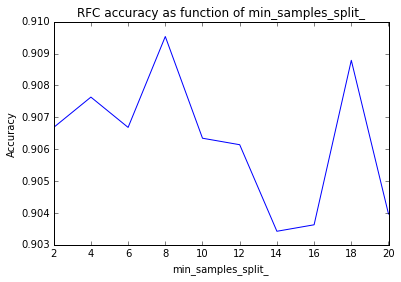

In [31]:
# 5. RFC Accuracy as function of min_samples_split parameter
min_samples_leaf = range(2, 21, 2)
accuracies = []
for n in min_samples_leaf:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(min_samples_leaf=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(min_samples_leaf, accuracies)
plt.xlabel('min_samples_split_')
plt.ylabel('Accuracy')
plt.title('RFC accuracy as function of min_samples_split_') 
plt.show()

Feature importance mean: 0.0017825311943
Top 10 features are: ['53_tGravityAcc-min()-X', '560_angle(Y_gravityMean)', '57_tGravityAcc-energy()-X', '559_angle(X_gravityMean)', '41_tGravityAcc-mean()-X', '51_tGravityAcc-max()-Y', '54_tGravityAcc-min()-Y', '50_tGravityAcc-max()-X', '97_tBodyAccJerk-energy()-X', '58_tGravityAcc-energy()-Y']


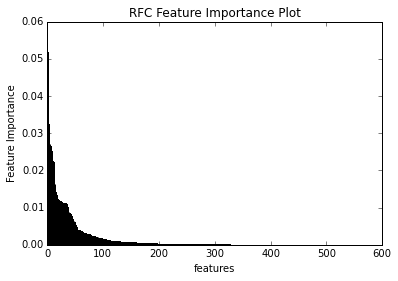

In [42]:
# 6. RFC Feature Importance graph
rfc = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=8, min_samples_split=6, min_samples_leaf=8, 
            min_weight_fraction_leaf=0.0, max_features=24, max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=-1, 
            random_state=None, verbose=0, warm_start=False, class_weight=None)
rfc.fit(X_train, y_train)
fi_mean = np.mean(rfc.feature_importances_)
print 'Feature importance mean:', fi_mean
fi_sorted_index = np.argsort(rfc.feature_importances_)
print "Top 10 features are:", list(X_train_df.columns[fi_sorted_index[-1:-11:-1]])
index = np.arange(n_features)
plt.bar(index, rfc.feature_importances_[fi_sorted_index[::-1]], color='b',)
plt.xlabel('features')
plt.ylabel('Feature Importance')
plt.title('RFC Feature Importance Plot') 
plt.show()

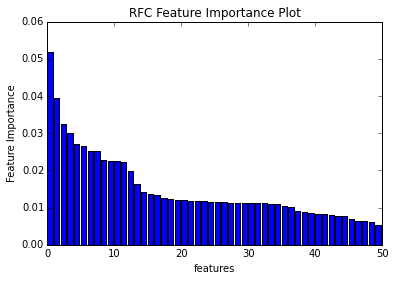

In [44]:
index = np.arange(50)
plt.bar(index, rfc.feature_importances_[fi_sorted_index[-1:-51:-1]], color='b',)
plt.xlabel('features')
plt.ylabel('Feature Importance')
plt.title('RFC Feature Importance Plot') 
plt.show()